## Генерация нотной грамоты для пианино по мелодии

Ссылка на датасет https://drive.google.com/drive/folders/1605Vh_DNXQ44J7qkzN8HvLe-c6naCPfM?usp=sharing

Датасет (~/data) содержит 4510 звуковых семплов отдельных нот/клавиш различных пианино, таблица источников и названий инструментов представлена в Таблице - 1. Часть записей собиралась вручную. 

In [11]:
import pandas as pd
import os

data_folder = "~/data"
files_portraits = os.listdir(data_folder)
df = pd.DataFrame(files_portraits, columns=['Package Name of Samples'])
df['Piano Name'] = ''

for index, row in df.iterrows():
    if row['Package Name of Samples'].startswith('NO_SptkBGAm') or row['Package Name of Samples'].startswith('ST_SptkBGAm') or row['Package Name of Samples'].startswith('RE_SptkBGAm'):
        df.at[index, 'Piano Name'] = 'Hybrid'
    elif row['Package Name of Samples'].startswith('NO_AkPnStgb') or row['Package Name of Samples'].startswith('ST_AkPnStgb') or row['Package Name of Samples'].startswith('RE_AkPnStgb'):
        df.at[index, 'Piano Name'] = 'Steingraeber 130 (upright)'
    elif row['Package Name of Samples'].startswith('NO_AkPnBsdf') or row['Package Name of Samples'].startswith('ST_AkPnBsdf') or row['Package Name of Samples'].startswith('RE_AkPnBsdf'):
        df.at[index, 'Piano Name'] = 'Boesendorfer 290 Imperial'
    elif row['Package Name of Samples'].startswith('NO_AkPnCGdD') or row['Package Name of Samples'].startswith('ST_AkPnCGdD') or row['Package Name of Samples'].startswith('RE_AkPnCGdD'):
        df.at[index, 'Piano Name'] = 'Concert Grand D'
    elif row['Package Name of Samples'].startswith('NO_SptkBGAm') or row['Package Name of Samples'].startswith('ST_SptkBGAm') or row['Package Name of Samples'].startswith('RE_SptkBGAm'):
        df.at[index, 'Piano Name'] = 'Steinway D'
    elif row['Package Name of Samples'].startswith('NO_ENSTDkCl') or row['Package Name of Samples'].startswith('ST_ENSTDkCl') or row['Package Name of Samples'].startswith('RE_ENSTDkCl'):
        df.at[index, 'Piano Name'] = 'Yamaha Disklavier Mark III (upright)'
    elif row['Package Name of Samples'].startswith('NO_ENSTDkAm1') or row['Package Name of Samples'].startswith('ST_ENSTDkAm1') or row['Package Name of Samples'].startswith('RE_ENSTDkAm1'):
        df.at[index, 'Piano Name'] = 'Yamaha Disklavier Mark III (upright)'
    elif row['Package Name of Samples'].startswith('NO_ENSTDkAm1') or row['Package Name of Samples'].startswith('ST_ENSTDkAm1') or row['Package Name of Samples'].startswith('RE_ENSTDkAm1'):
        df.at[index, 'Piano Name'] = 'Yamaha Disklavier Mark III (upright)'
    elif row['Package Name of Samples'].startswith('Theremin_Music_Uiowa_Edu'):
        df.at[index, 'Piano Name'] = 'Steinway & Sons model B'
    else:
        df.at[index, 'Piano Name'] = 'Piano'

df['Data Source'] = ''
for index, row in df.iterrows():
    if row['Package Name of Samples'].startswith('NO') or row['Package Name of Samples'].startswith('ST') or row['Package Name of Samples'].startswith('RE'):
        df.at[index, 'Data Source'] = 'ADASP - https://amubox.univ-amu.fr/index.php/s/iNG0xc5Td1Nv4rR?'
    elif row['Package Name of Samples'].startswith('WWW_Onlinepianist_Com'):
        df.at[index, 'Data Source'] = 'Online Pianist - https://www.onlinepianist.com/'
    elif row['Package Name of Samples'].startswith('Theremin_Music_Uiowa_Edu'):
        df.at[index, 'Data Source'] = 'EMS University - https://theremin.music.uiowa.edu/MISpiano.html'
    elif row['Package Name of Samples'].startswith('Virtual_Piano_Keyboard'):
        df.at[index, 'Data Source'] = 'VirtualPianoKey - https://apps.apple.com/ru/app'
    elif row['Package Name of Samples'].startswith('Real_Piano'):
        df.at[index, 'Data Source'] = 'Real Piano - https://www.bluestacks.com/ru/apps/music/real-piano-on-pc.html'

df.head(10)

,Package Name of Samples,Piano Name,Data Source
0,NO_SptkBGAm_P,Hybrid,ADASP - https://amubox.univ-amu.fr/index.php/s...
1,ST_AkPnStgb_P,Steingraeber 130 (upright),ADASP - https://amubox.univ-amu.fr/index.php/s...
2,RE_StbgTGd2_P,Piano,ADASP - https://amubox.univ-amu.fr/index.php/s...
3,NO_ENSTDkCl_M,Yamaha Disklavier Mark III (upright),ADASP - https://amubox.univ-amu.fr/index.php/s...
4,NO_AkPnCGdD_M,Concert Grand D,ADASP - https://amubox.univ-amu.fr/index.php/s...
5,ST_AkPnCGdD_F,Concert Grand D,ADASP - https://amubox.univ-amu.fr/index.php/s...
6,RE_AkPnCGdD_P,Concert Grand D,ADASP - https://amubox.univ-amu.fr/index.php/s...
7,NO_AkPnBsdf_F,Boesendorfer 290 Imperial,ADASP - https://amubox.univ-amu.fr/index.php/s...
8,NO_StbgTGd2_M,Piano,ADASP - https://amubox.univ-amu.fr/index.php/s...
9,ST_AkPnBsdf_P,Boesendorfer 290 Imperial,ADASP - https://amubox.univ-amu.fr/index.php/s...


Каждый пакет (за исключением RE_ файлов) содержит 88 клавиш, представляющих звуки фортепиано. Ниже представлена кодировка клавиш, которая использовалась при составлении датасета (для черных клавиш был взят диез - #). 

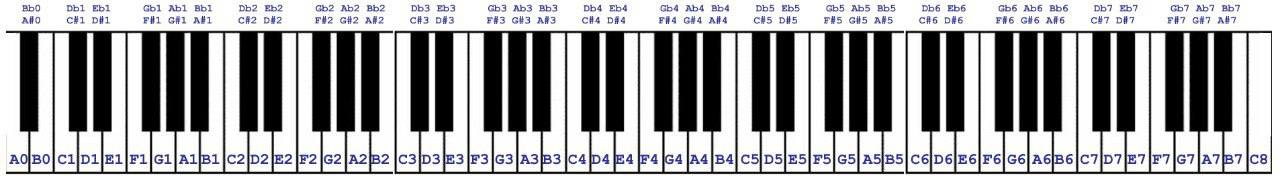

In [23]:
from PIL import Image
import IPython.display as display

image_path = "~/image/code.jpg"
image = Image.open(image_path)
display.display(image)

Каждый пакет семплов имеет следующий вид (за исключением RE_ файлов - их по 22 клавиши).

In [12]:
data_folder = "~/data/NO_AkPnBsdf_F"
files_portraits = os.listdir(data_folder) 
df = pd.DataFrame(files_portraits, columns=['Notes'])
df['Notes'] = df['Notes'].apply(lambda x: x.split('.')[0])
df

,Notes
0,B4
1,F4
2,C#5
3,C8
4,G#1
...,...
83,D#7
84,G3
85,C4
86,G4


Каждому буквенному обозначению ноты соответствует свое место на нотном стане. 

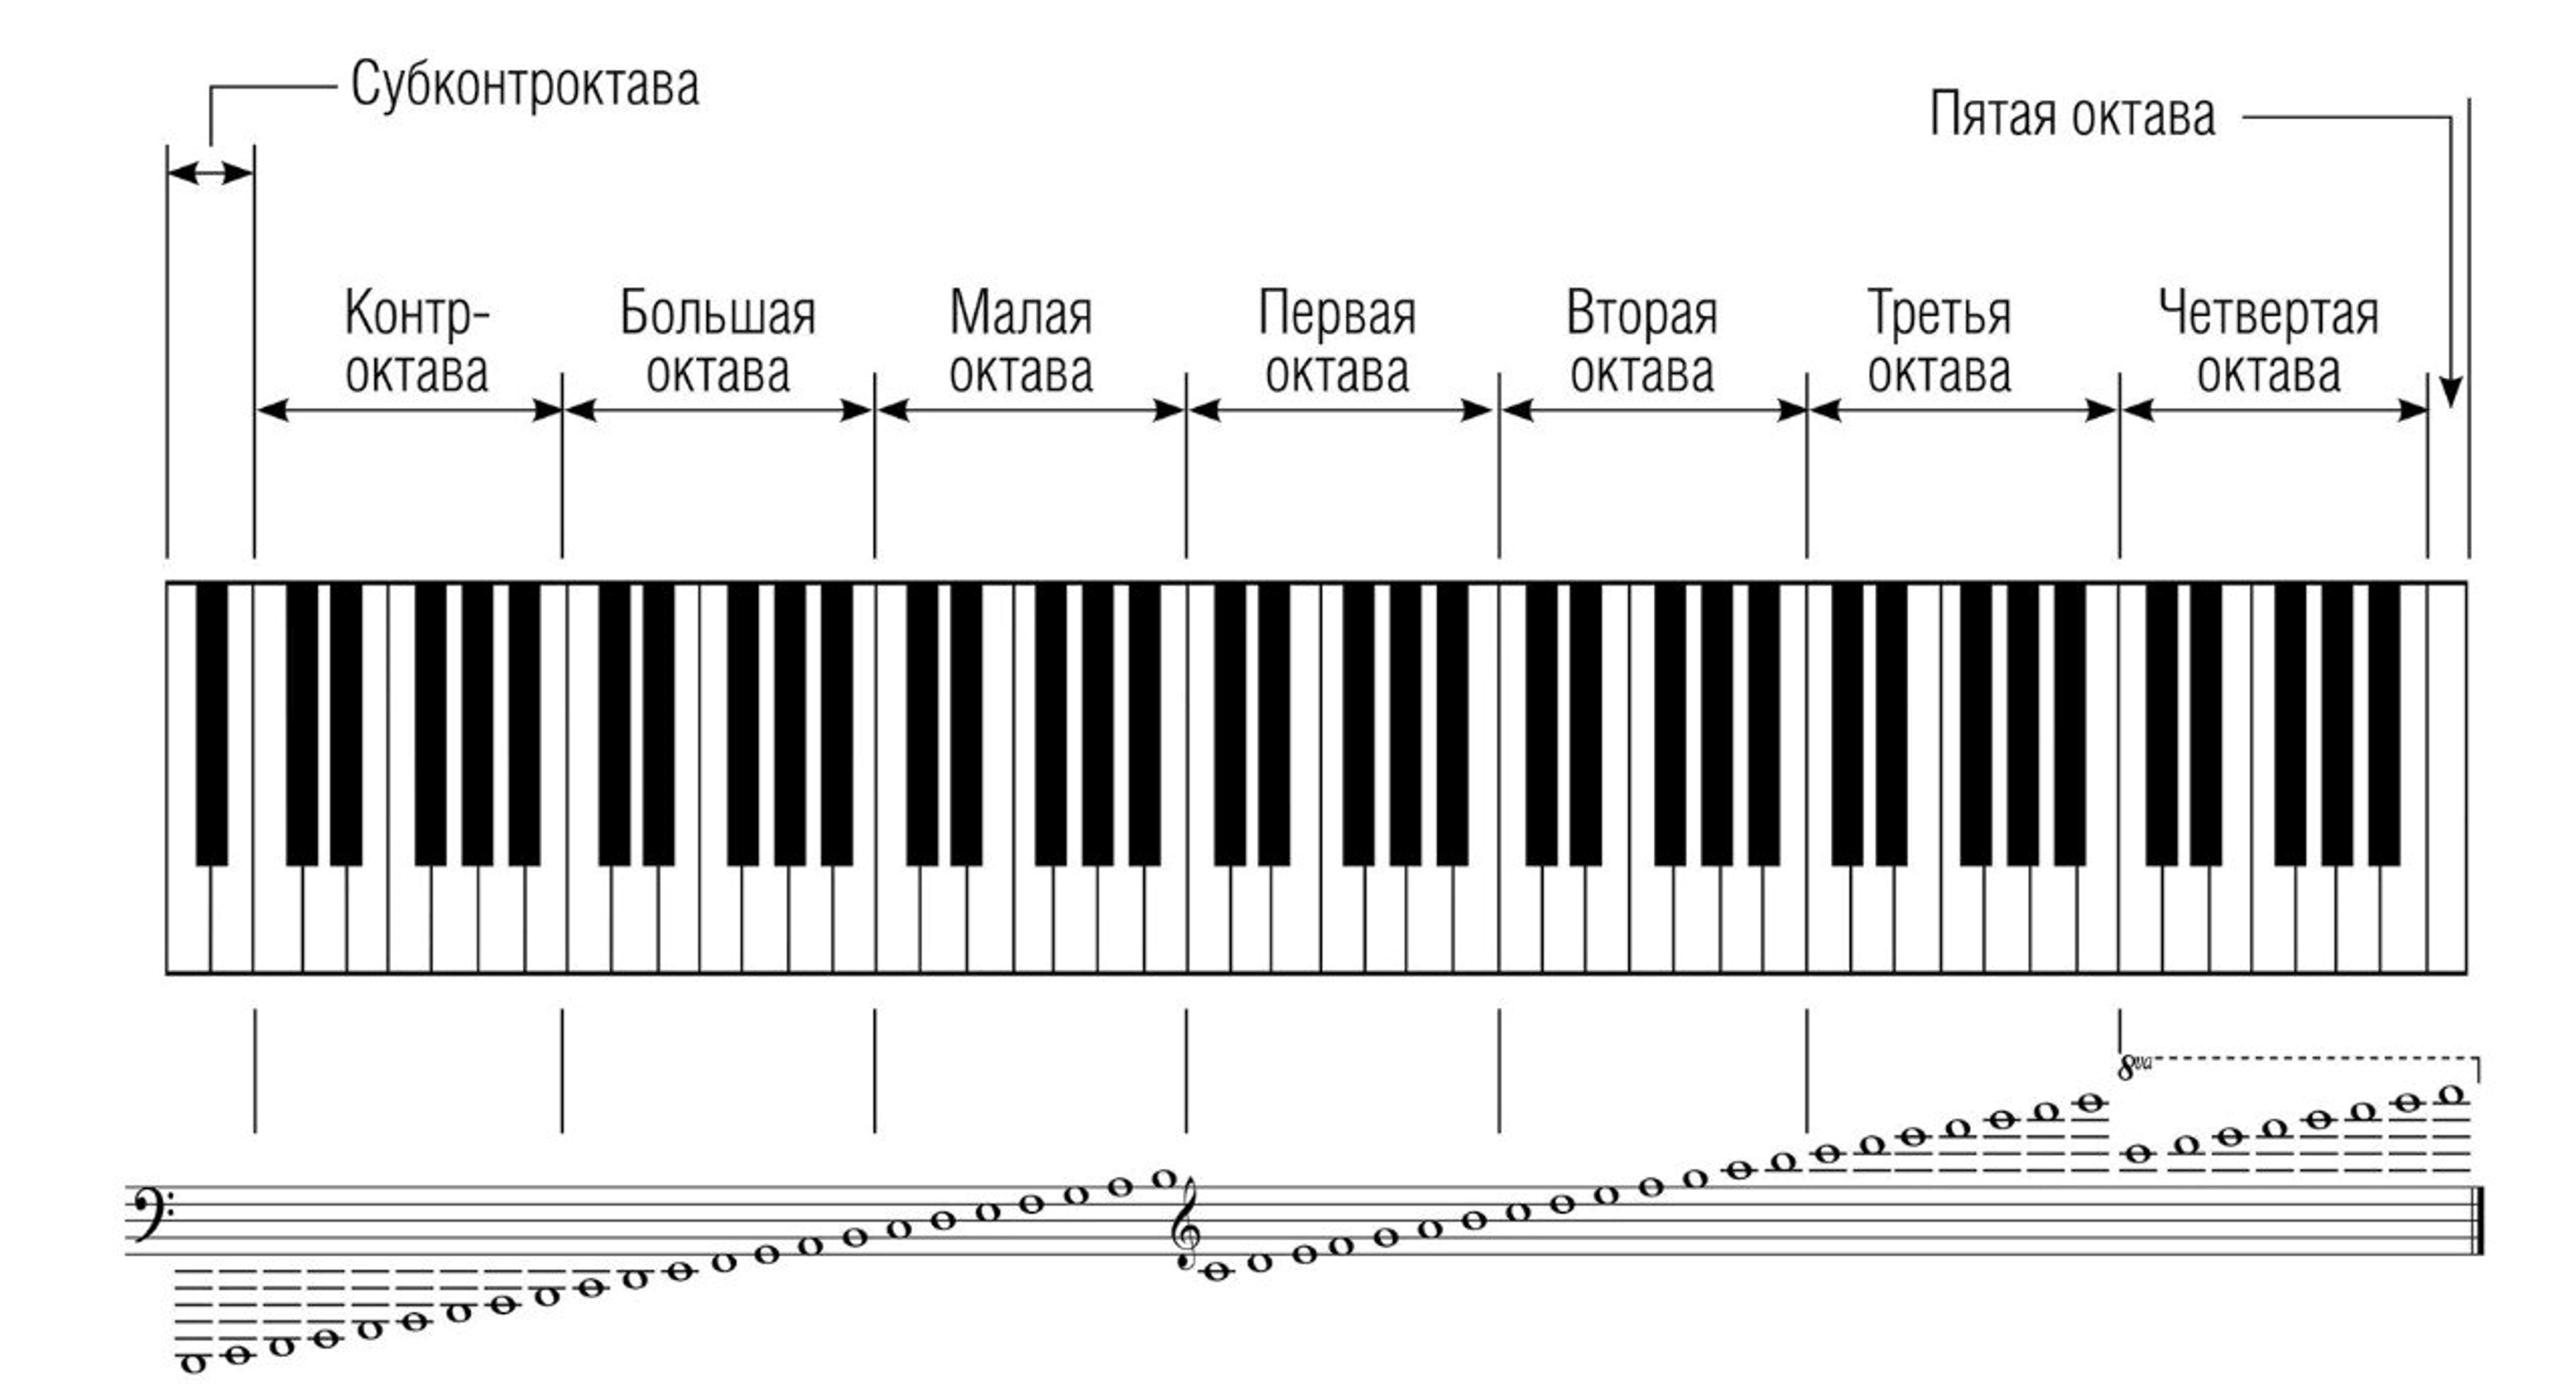

In [3]:
image_path = "~/image/staff.png"
image = Image.open(image_path)
display.display(image)

Датасет с изображениями /images_notes содержит четвертные ноты. Диезы обозначены следующим образом. 

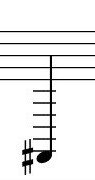

In [1]:
image_path = "~/images_notes/A#0.jpg"
image = Image.open(image_path)
display.display(image)

Распределение нот по октавам и музыкальным ключам (басовый и скрипичный). 

In [20]:
def get_octave(filename):
    if filename.endswith('0'):      # название ноты оканчивается на соответствующую октаву
        return 'subcontra_octave'
    elif filename.endswith('1'):
        return 'contra_octave'
    elif filename.endswith('2'):
        return 'great_octave'
    elif filename.endswith('3'):
        return 'small_octave'
    elif filename.endswith('4'):
        return '1st_octave'
    elif filename.endswith('5'):
        return '2nd_octave'
    elif filename.endswith('6'):
        return '3rd_octave'
    elif filename.endswith('7'):
        return '4th_octave'
    elif filename.endswith('8'):
        return '5th_octave'

df['Octave'] = df['Notes'].apply(get_octave)

def get_key(filename):
    if filename.endswith('0') or filename.endswith('1') or filename.endswith('2') or filename.endswith('3'):
        return 'Bass_Clef'
    elif filename.endswith('4') or filename.endswith('5') or filename.endswith('6') or filename.endswith('7') or filename.endswith('8'):
        return 'Treble_Clef'

df['Musical Key'] = df['Notes'].apply(get_key)
df.head(10)

df.head(10)

,Notes,Octave,Musical Key
0,B4,1st_octave,Treble_Clef
1,F4,1st_octave,Treble_Clef
2,C#5,2nd_octave,Treble_Clef
3,C8,5th_octave,Treble_Clef
4,G#1,contra_octave,Bass_Clef
5,F#5,2nd_octave,Treble_Clef
6,F3,small_octave,Bass_Clef
7,G#5,2nd_octave,Treble_Clef
8,F#7,4th_octave,Treble_Clef
9,A#1,contra_octave,Bass_Clef


Взглянем на метаинформацию одного семпла аудио. 

In [13]:
import audio_metadata
import librosa 
from IPython.display import Audio

data = audio_metadata.load('~/data/NO_AkPnBsdf_F/A#0.wav')
data

<WAVE({
    'filepath': '/home/nermakovaa/ermak/semester_3/Speech_processing/data/NO_AkPnBsdf_F/A#0.wav',
    'filesize': '775.24 KiB',
    'pictures': [],
    'streaminfo': <WAVEStreamInfo({
        'audio_format': <WAVEAudioFormat.PCM>,
        'bit_depth': 16,
        'bitrate': '1411 Kbps',
        'channels': 2,
        'duration': '00:05',
        'sample_rate': '44.1 KHz',
    })>,
    'tags': <RIFFTags({})>,
})>

In [16]:
data, sr = librosa.load('~/data/NO_AkPnBsdf_F/A#0.wav', duration=30) 

Audio(data=data, rate=sr)

Поскольку часть данных представлена в формате .wav, а часть в формате .mp3, приведем их к одному формату. 

In [33]:
import os
from pydub import AudioSegment

def convert_to_wav(folder_path):

    file_list = os.listdir(folder_path)

    for file_name in file_list:
        if file_name.endswith(".mp3"):
            mp3_file_path = os.path.join(folder_path, file_name)
            audio = AudioSegment.from_mp3(mp3_file_path)
            
            wav_file_path = os.path.splitext(mp3_file_path)[0] + ".wav"
            audio.export(wav_file_path, format="wav")

convert_to_wav("~/data/Theremin_Music_Uiowa_Edu")
convert_to_wav("~/data/Real_Piano")
convert_to_wav("~/data/Virtual_Piano_Keyboard")
convert_to_wav("~/data/WWW_Onlinepianist_Com")

In [35]:
def delete_mp3(folder_path):
    file_list_new = os.listdir(folder_path)

    for file_name in file_list_new:
        if file_name.endswith(".mp3"):
            file_path = os.path.join(folder_path, file_name)
            os.remove(file_path)

delete_mp3("~/data/Theremin_Music_Uiowa_Edu")
delete_mp3("~/data/Real_Piano")
delete_mp3("~/data/Virtual_Piano_Keyboard")
delete_mp3("~/data/WWW_Onlinepianist_Com")

### Предобработка

Ссылка на предобработанный датасет https://drive.google.com/file/d/1dYNEnSf_JWTQZKxXwPaApNgfUx9FXPGE/view?usp=sharing

In [ ]:
import librosa
from scipy.io.wavfile import write

def audio_preprocessing(file_name, input_path, output_path):

    audio_path = input_path + file_name
    y, sr = librosa.load(audio_path)

    y_normed = (y/max(max(y), abs(min(y))))* 0.02 # нормализация по максимальному значению, домножаем на 0.02, чтобы не возникало слишком громкого звука
    y_filtered_norm = librosa.effects.preemphasis(y_normed) # фильтром сглаживаем нормализованную аудиодорожку, чтобы перепады были менее выраженными
    max_y = max(max(y_filtered_norm), abs(min(y_filtered_norm))) # определяем максимальное значение амплитуды по всей аудиодорожке (отфильтр. + нормирован.)

    first_bigger = 0
    for num, i in enumerate(y_filtered_norm): # в цикле определяем исходную точку, с которой будет начинаться обрезанная аудиодорожка (порядковый номер, амплитуда)
        if abs(i) > max_y*0.2: # сравниваем амплитуду по модулю, если больше, чем ~20% от максималной амплитуды во всей дорожке, то эта амплитуда = исходная точка
            first_bigger = num
            break

    y_filtered_norm_cut = y_filtered_norm[first_bigger:first_bigger + sr] # обрезаем дорожку, начиная с исходной точки до исх.т. + частота дискрет. (1 секунда)
    output_audio_path = output_path + file_name
    write(output_audio_path, sr, y_filtered_norm_cut) # записываем путь до предобработанной дорожки

    return y_filtered_norm_cut